In [1]:
%cd ../

/home/eli/AnacondaProjects/HTFATorch


In [2]:
import logging
import numpy as np
import htfa_torch.htfa as HTFA
import htfa_torch.niidb as niidb
import htfa_torch.utils as utils

In [3]:
%matplotlib inline

In [4]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [5]:
lepping_db = niidb.FMriActivationsDb('data/sound_depression.db', mask='/home/eli/Documents/sound_depression/ds000171-download/all_tasks/wholebrain.nii.gz')

In [6]:
htfa = HTFA.HierarchicalTopographicFactorAnalysis(list(lepping_db.all()), mask='/home/eli/Documents/sound_depression/ds000171-download/all_tasks/wholebrain.nii.gz', num_factors=100)

09/19/2019 14:17:03 Loading Nifti image /home/eli/Documents/sound_depression/fmriprep/sub-control01/func/sub-control01_task-nonmusic_run-5_bold_space-MNI152NLin2009cAsym_preproc.nii.gz with mask /home/eli/Documents/sound_depression/ds000171-download/all_tasks/wholebrain.nii.gz (zscore=True, smooth=6)
09/19/2019 14:17:05 Loading Nifti image /home/eli/Documents/sound_depression/fmriprep/sub-control01/func/sub-control01_task-music_run-3_bold_space-MNI152NLin2009cAsym_preproc.nii.gz with mask /home/eli/Documents/sound_depression/ds000171-download/all_tasks/wholebrain.nii.gz (zscore=True, smooth=6)
09/19/2019 14:17:08 Loading Nifti image /home/eli/Documents/sound_depression/fmriprep/sub-control01/func/sub-control01_task-music_run-2_bold_space-MNI152NLin2009cAsym_preproc.nii.gz with mask /home/eli/Documents/sound_depression/ds000171-download/all_tasks/wholebrain.nii.gz (zscore=True, smooth=6)
09/19/2019 14:17:10 Loading Nifti image /home/eli/Documents/sound_depression/fmriprep/sub-control01/

In [7]:
losses = htfa.train(num_steps=1500, learning_rate=1e-2, log_level=logging.INFO, num_particles=1,
                    batch_size=50, use_cuda=True, checkpoint_steps=50, blocks_batch_size=12,
                    blocks_filter=lepping_db.inference_filter(training=True))

09/19/2019 14:23:38 [Epoch 1] (23169ms) Posterior free-energy 6.25336525e+09
09/19/2019 14:23:38 Saving checkpoint...
09/19/2019 14:24:01 [Epoch 2] (22104ms) Posterior free-energy 5.32515021e+09
09/19/2019 14:24:22 [Epoch 3] (21509ms) Posterior free-energy 4.44015258e+09
09/19/2019 14:24:43 [Epoch 4] (21178ms) Posterior free-energy 3.84380390e+09
09/19/2019 14:25:04 [Epoch 5] (21160ms) Posterior free-energy 3.35164211e+09
09/19/2019 14:25:25 [Epoch 6] (20830ms) Posterior free-energy 3.03223373e+09
09/19/2019 14:25:46 [Epoch 7] (20805ms) Posterior free-energy 2.72708429e+09
09/19/2019 14:26:07 [Epoch 8] (20839ms) Posterior free-energy 2.50112256e+09
09/19/2019 14:26:28 [Epoch 9] (20853ms) Posterior free-energy 2.34996480e+09
09/19/2019 14:26:49 [Epoch 10] (20895ms) Posterior free-energy 2.20297318e+09
09/19/2019 14:27:10 [Epoch 11] (21354ms) Posterior free-energy 2.07975962e+09
09/19/2019 14:27:32 [Epoch 12] (21822ms) Posterior free-energy 1.97831501e+09
09/19/2019 14:27:53 [Epoch 13] (

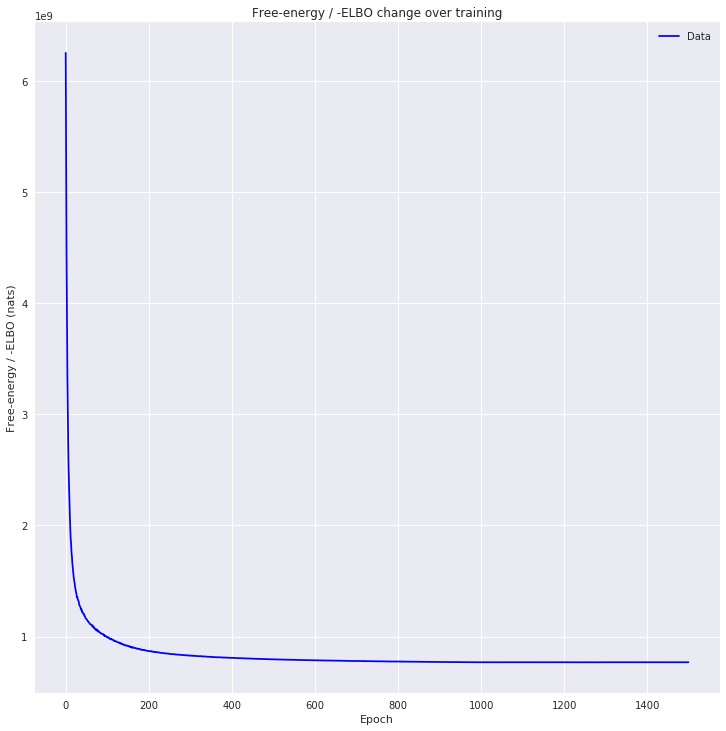

In [8]:
utils.plot_losses(losses)

In [9]:
losses = htfa.train(num_steps=1000, learning_rate=1e-2, log_level=logging.INFO, num_particles=1,
                    batch_size=50, use_cuda=True, checkpoint_steps=50, blocks_batch_size=12,
                    train_globals=False, blocks_filter=lepping_db.inference_filter(training=False))

09/19/2019 23:11:51 [Epoch 1] (4470ms) Posterior free-energy 1.25258880e+09
09/19/2019 23:11:51 Saving checkpoint...
09/19/2019 23:11:56 [Epoch 2] (4445ms) Posterior free-energy 1.12301850e+09
09/19/2019 23:12:00 [Epoch 3] (4461ms) Posterior free-energy 1.05659533e+09
09/19/2019 23:12:04 [Epoch 4] (4383ms) Posterior free-energy 9.89037376e+08
09/19/2019 23:12:09 [Epoch 5] (4425ms) Posterior free-energy 8.61638720e+08
09/19/2019 23:12:13 [Epoch 6] (4314ms) Posterior free-energy 7.92644160e+08
09/19/2019 23:12:17 [Epoch 7] (4317ms) Posterior free-energy 7.46015040e+08
09/19/2019 23:12:22 [Epoch 8] (4285ms) Posterior free-energy 6.79376384e+08
09/19/2019 23:12:26 [Epoch 9] (4280ms) Posterior free-energy 6.61793152e+08
09/19/2019 23:12:30 [Epoch 10] (4279ms) Posterior free-energy 6.35094912e+08
09/19/2019 23:12:35 [Epoch 11] (4268ms) Posterior free-energy 5.95879488e+08
09/19/2019 23:12:39 [Epoch 12] (4259ms) Posterior free-energy 5.85506176e+08
09/19/2019 23:12:43 [Epoch 13] (4271ms) Post

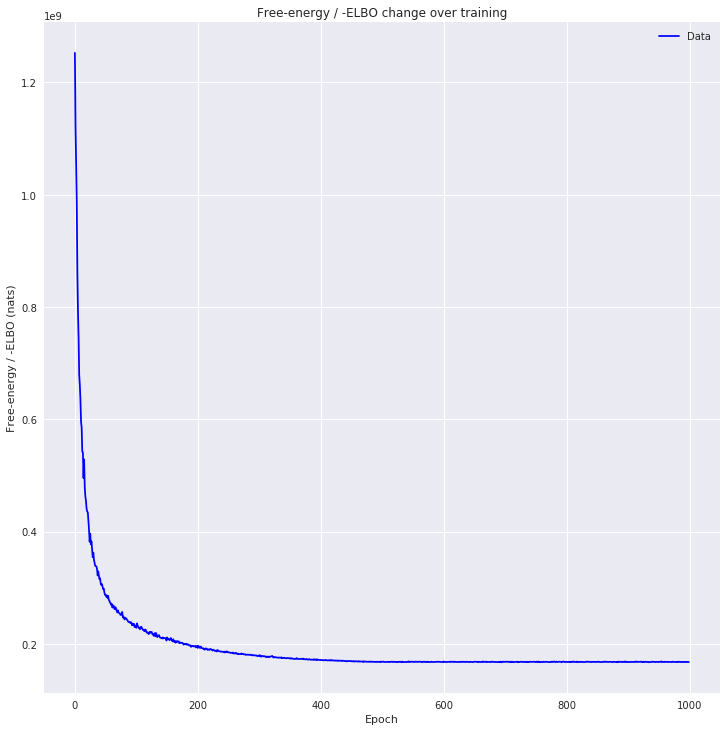

In [10]:
utils.plot_losses(losses)

In [11]:
import re

In [12]:
def subject_labeler(block):
    subject_regex = re.compile("([A-Za-z]+)([0-9]{1,2})")
    m = subject_regex.search(block.subject)
    condition, sub_num = m.groups()
    if condition == 'mdd':
        condition = 'Major Depressive'
    elif condition == 'control':
        condition = 'Control'
    return '%s Participant %d' % (condition, int(sub_num))

In [13]:
def task_labeler(block):
    if block.task == 'negative_music':
        task = 'Negative music'
    elif block.task == 'positive_music':
        task = 'Positive music'
    else:
        task = block.task.capitalize()
    return task

In [14]:
def lepping_2017_labeler(block):
    subject = subject_labeler(block)
    task = task_labeler(block)
    return subject + ', ' + task + ' stimulus'

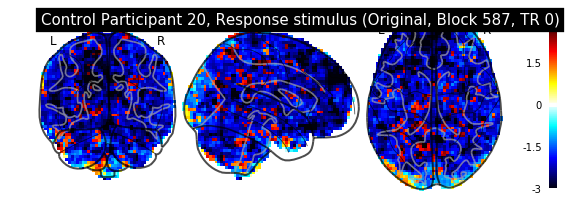

09/20/2019 00:22:58 Reconstruction Error (Frobenius Norm): 2.91035736e+02 out of 3.04206177e+02


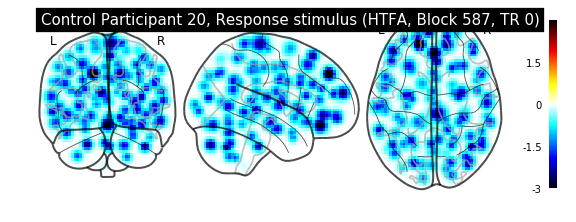

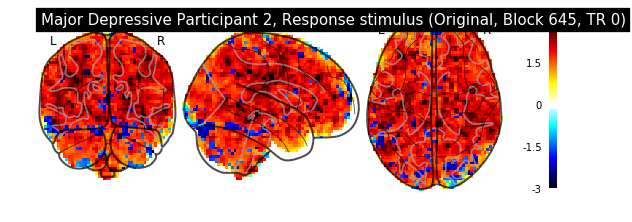

09/20/2019 00:23:00 Reconstruction Error (Frobenius Norm): 2.88826508e+02 out of 2.97757202e+02


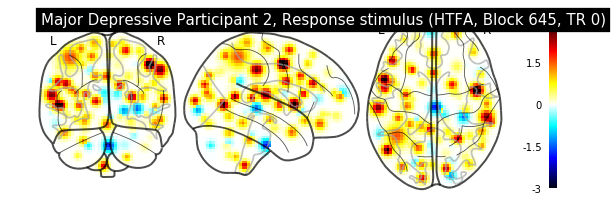

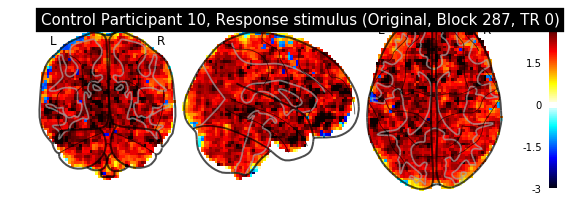

09/20/2019 00:23:03 Reconstruction Error (Frobenius Norm): 2.03759262e+02 out of 3.25902924e+02


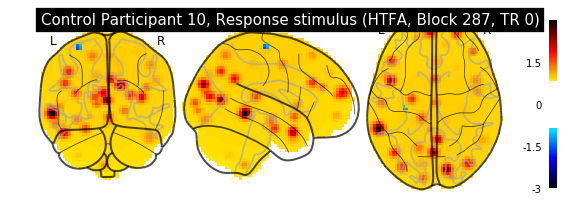

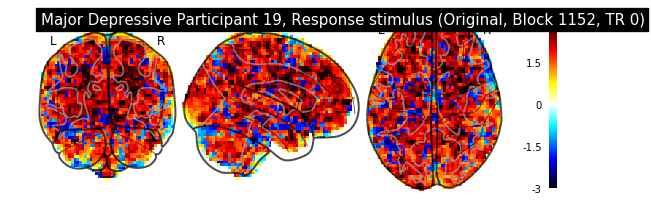

09/20/2019 00:23:05 Reconstruction Error (Frobenius Norm): 2.44785019e+02 out of 2.50784134e+02


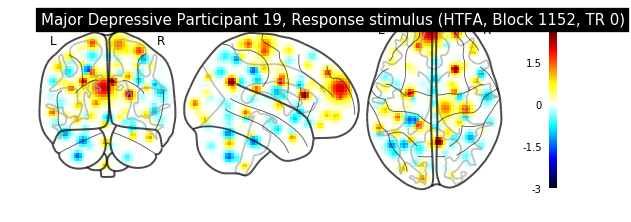

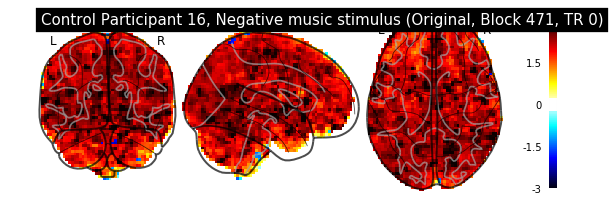

09/20/2019 00:23:08 Reconstruction Error (Frobenius Norm): 5.82295715e+02 out of 8.58397034e+02


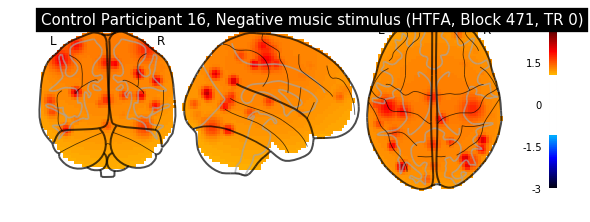

In [15]:
for b in np.random.choice(range(htfa.num_blocks), 5):
    htfa.plot_original_brain(b, labeler=lepping_2017_labeler)
    htfa.plot_reconstruction(b, labeler=lepping_2017_labeler)

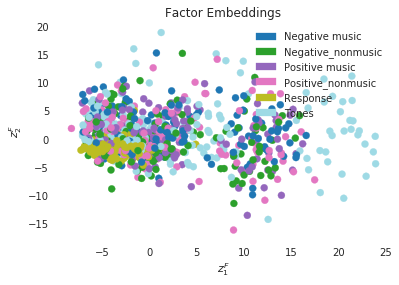

In [16]:
#factor 'embeddings' with PCA
htfa.scatter_factor_embedding(labeler=task_labeler, embedding='PCA')

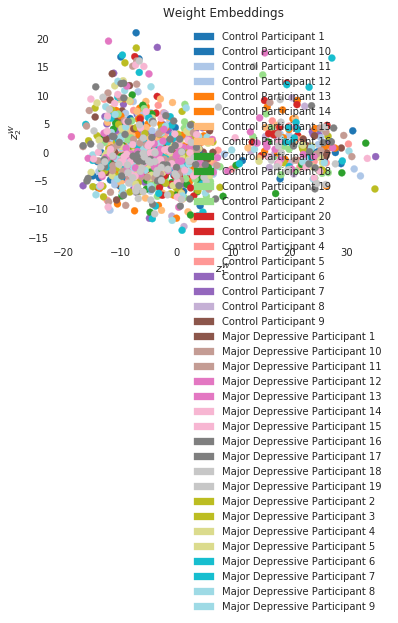

In [17]:
#weight 'embeddings' with PCA
htfa.scatter_weight_embedding(labeler=subject_labeler, embedding='PCA')

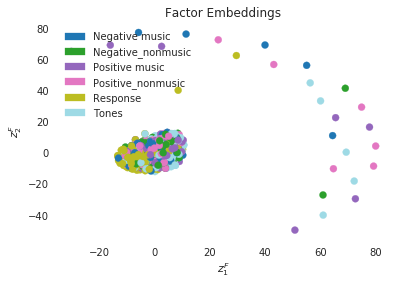

In [18]:
#factor 'embeddings' with TSNE
htfa.scatter_factor_embedding(labeler=task_labeler, embedding='TSNE')

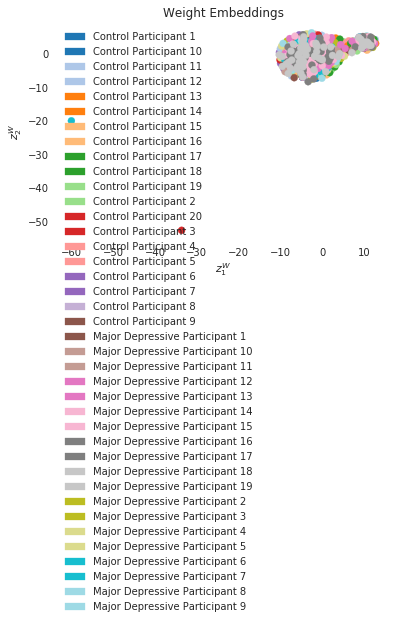

In [19]:
#weight 'embeddings' with TSNE
htfa.scatter_weight_embedding(labeler=subject_labeler, embedding='TSNE')

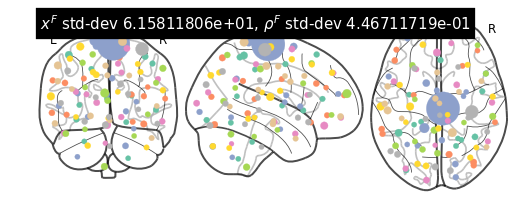

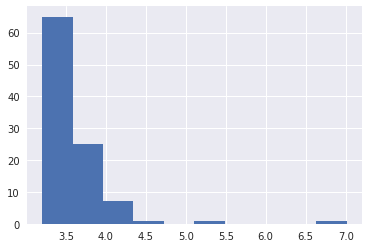

(<nilearn.plotting.displays.OrthoProjector at 0x7ff240e27c88>,
 tensor([[-33.4977, -85.7379, -10.4029],
         [ 50.1848,  15.8728,  -0.3048],
         [ -1.3188,  36.1658,  11.8548],
         [-17.8020, -34.8211,  42.7728],
         [ 20.8597, -52.4259, -51.2400],
         [ 38.7724, -50.7516,  55.6914],
         [-25.2615, -37.8842, -33.5450],
         [  2.4840,  30.0160,  58.5334],
         [-30.4632,  -6.3418,   4.7473],
         [ 24.4636, -53.8697,  14.5580],
         [ 18.8637, -60.2894, -13.2764],
         [ 46.4782,  -2.8258,  48.3976],
         [-41.5418, -46.4877,  57.5236],
         [ 11.5166, -69.1959,  55.0243],
         [-25.7199,  -6.7336,  32.6544],
         [-43.8319,  40.9536,  -5.4187],
         [ 24.5191,  58.9268,  15.6738],
         [ 37.4462, -80.7541,  14.0325],
         [ 41.4450,  39.9627,  23.6892],
         [-59.3357, -42.4997,  -3.4233],
         [ 25.6395,  23.9939, -12.9459],
         [-45.5847,  29.6325,  28.0090],
         [ 37.3080, -77.3684, -15.1

In [20]:
htfa.visualize_factor_template()

In [21]:
htfa.average_reconstruction_error()

09/20/2019 00:24:58 Average reconstruction error (MSE): 7.53541765e-01
09/20/2019 00:24:58 Average data norm (Euclidean): 9.63051332e-01
09/20/2019 00:24:58 Percent average reconstruction error: 0.304877


(0.7535417650932106, 0.9630513315252632, 0.0030487746565557813)

In [22]:
htfa.average_reconstruction_error(weighted=False)

09/20/2019 12:51:29 Average reconstruction error (MSE): 5.02398865e+02 +/- 2.01800690e+02
09/20/2019 12:51:29 Average data norm (Euclidean): 6.49919475e+02 +/- 2.93703974e+02
09/20/2019 12:51:29 Percent average reconstruction error: 81.144856 +/- 1.56212197e+01


(array([653.43341064, 306.09524536, 553.46276855, ..., 743.95819092,
        703.94580078, 734.74078369]),
 array([1174.47668457,  370.93035889,  983.57342529, ...,  804.38287354,
         790.49334717,  846.68164062]),
 array([0.55636133, 0.82520947, 0.5627061 , ..., 0.92488069, 0.89051452,
        0.86778873]))